In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

<Axes: xlabel='count', ylabel='sentiment'>

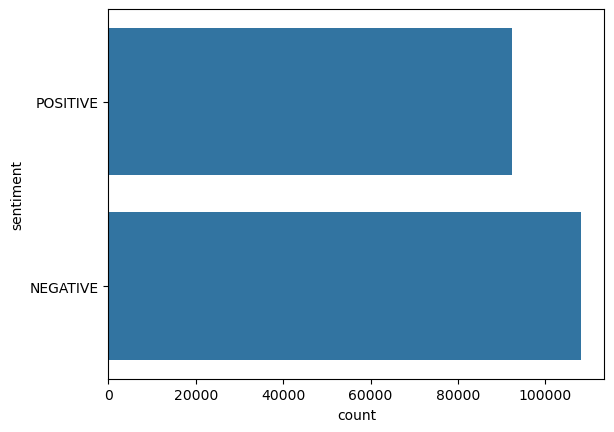

In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (6)\News_sentiment_Jan2017_to_Apr2021.csv")
df.drop(['Date','URL','confidence','Unnamed: 5'],axis=1)
sns.countplot(df.sentiment)

In [5]:
df_pos = df[df.sentiment=='POSITIVE'].head(5000)
df_neg =  df[df.sentiment=='NEGATIVE'].tail(5000)
df_final = pd.concat([df_pos,df_neg],axis=0)
df_final

,Date,Title,URL,sentiment,confidence,Unnamed: 5
0,05/01/17,Eliminating shadow economy to have positive im...,http://economictimes.indiatimes.com/news/econo...,POSITIVE,0.996185,NaN
2,05/01/17,SoftBank India Vision gets new $100,http://economictimes.indiatimes.com/small-biz/...,POSITIVE,0.595612,NaN
4,05/01/17,Despite challenges Rajasthan continues to prog...,http://economictimes.indiatimes.com/news/polit...,POSITIVE,0.997388,NaN
12,05/01/17,Mapping the market : Many PSU stocks hit 52,http://economictimes.indiatimes.com/markets/st...,POSITIVE,0.722102,NaN
13,05/01/17,Amazon . in sees 160 per cent growth in seller...,http://economictimes.indiatimes.com/industry/s...,POSITIVE,0.863449,NaN
...,...,...,...,...,...,...
200493,12/04/21,Nomura cuts India FY22 GDP growth estimate to ...,https://www.businesstoday.in/current/corporate...,NEGATIVE,-0.511845,NaN
200494,12/04/21,Alibaba does not expect material impact after ...,https://www.businesstoday.in/current/corporate...,NEGATIVE,-0.994512,NaN
200496,11/04/21,"Bitcoin resurges beyond $60 , 000 over reports...",https://www.businesstoday.in/markets/commoditi...,NEGATIVE,-0.994247,NaN
200497,11/04/21,FPIs withdraw Rs 929 cr from Indian markets so...,https://www.businesstoday.in/current/economy-p...,NEGATIVE,-0.998080,NaN


In [6]:
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')
def cleanText(txt):

    txt = txt.lower()
    words = nltk.word_tokenize(txt)
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text = "".join(words)
    txt = re.sub('[^a-z]', ' ', txt)
    return txt  
df_final['cleaned_text'] = df_final['Title'].apply(cleanText)
df_final.head()

,Date,Title,URL,sentiment,confidence,Unnamed: 5,cleaned_text
0,05/01/17,Eliminating shadow economy to have positive im...,http://economictimes.indiatimes.com/news/econo...,POSITIVE,0.996185,NaN,eliminating shadow economy to have positive im...
2,05/01/17,SoftBank India Vision gets new $100,http://economictimes.indiatimes.com/small-biz/...,POSITIVE,0.595612,NaN,softbank india vision gets new
4,05/01/17,Despite challenges Rajasthan continues to prog...,http://economictimes.indiatimes.com/news/polit...,POSITIVE,0.997388,NaN,despite challenges rajasthan continues to prog...
12,05/01/17,Mapping the market : Many PSU stocks hit 52,http://economictimes.indiatimes.com/markets/st...,POSITIVE,0.722102,NaN,mapping the market many psu stocks hit
13,05/01/17,Amazon . in sees 160 per cent growth in seller...,http://economictimes.indiatimes.com/industry/s...,POSITIVE,0.863449,NaN,amazon in sees per cent growth in seller...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [8]:
X=df_final.cleaned_text
y = df_final.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [9]:
tfidf_vectorizer = TfidfVectorizer( max_df=0.8, ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [10]:
print(tfidf_train)

print(tfidf_test)

  (0, 25662)	0.12099395028651795
  (0, 24685)	0.09578957685088704
  (0, 43025)	0.31466100307285594
  (0, 748)	0.19045660934697659
  (0, 59292)	0.22073054764806208
  (0, 7608)	0.20633563862910426
  (0, 35111)	0.21195095719778695
  (0, 25893)	0.269112048495569
  (0, 25259)	0.38534061791060925
  (0, 43026)	0.38534061791060925
  (0, 897)	0.3473507962453854
  (0, 59299)	0.38534061791060925
  (0, 7645)	0.2571846216990856
  (1, 24685)	0.08036200595957901
  (1, 38304)	0.15505868216353771
  (1, 34916)	0.15424022193044631
  (1, 19633)	0.22372305370373904
  (1, 43433)	0.27970406022450633
  (1, 58441)	0.13812884152014931
  (1, 46217)	0.18145005669573167
  (1, 33695)	0.2055597639015799
  (1, 36043)	0.10345515263045085
  (1, 20366)	0.18057679857021436
  (1, 38377)	0.27970406022450633
  (1, 34982)	0.28506587638772773
  :	:
  (7998, 50004)	0.2098754137818184
  (7998, 49724)	0.215465410697685
  (7998, 31757)	0.215465410697685
  (7998, 18190)	0.22267217015044263
  (7998, 3376)	0.22267217015044263
  (799

In [11]:
nb_clf = MultinomialNB()
svm_clf = SVC(kernel='linear', probability=True)
rf_clf = RandomForestClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier(n_estimators=100)

ensemble_clf = VotingClassifier(estimators=[
    ('nb', nb_clf),
    ('svm', svm_clf),
    ('rf', rf_clf),
    ('ada', ada_clf)
], voting='soft') 

classifiers = {
    'Multinomial Naive Bayes': nb_clf,
    'SVM': svm_clf,
    'Random Forest': rf_clf,
    'AdaBoost': ada_clf,
    'Ensemble': ensemble_clf
}
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
for clf_name, clf in classifiers.items():
    clf.fit(tfidf_train, y_train)
    y_pred = clf.predict(tfidf_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print("------------------------------")
    results_df = results_df.append({
        'Classifier': clf_name,
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-score': report['macro avg']['f1-score']
    }, ignore_index=True)
print(results_df)

Classifier: Multinomial Naive Bayes
Accuracy: 0.8245
------------------------------


AttributeError: 'DataFrame' object has no attribute 'append'

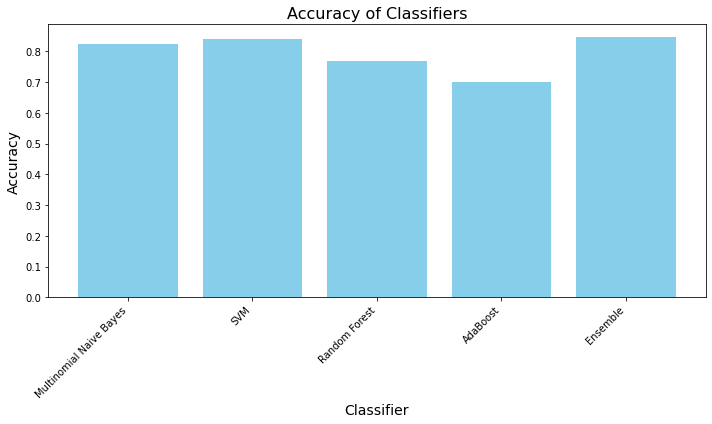

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(results_df['Classifier'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Classifiers', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# WEBSCRAPING

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_google_news(keyword):
    url = f"https://news.google.com/search?q={keyword}+when:30d&tbm=nws"
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        news_results = soup.find_all('a', class_='JtKRv')
        headlines = []
        for result in news_results:
            title = result.get_text()
            headlines.append(title)
        
        df = pd.DataFrame(headlines, columns=['Headline'])
        return df
    else:
        print("Failed to retrieve search results.")
        return None

# Example usage
keyword = input()
dfws = scrape_google_news(keyword)
dfws.head()

hdfc 


,Headline
0,Q2 Results 2024: HDFC Bank to announce Q2FY25 ...
1,HDFC Bank in talks with global lenders to offl...
2,HDFC Bank announces board meeting on October 1...
3,We have taken a temporary break from our partn...
4,RBI fines Axis Bank and HDFC Bank for regulato...


In [12]:
dfws['cleaned_text'] = dfws['Headline'].apply(cleanText)
dfws.head()

,Headline,cleaned_text
0,Q2 Results 2024: HDFC Bank to announce Q2FY25 ...,q results hdfc bank to announce q fy ...
1,HDFC Bank in talks with global lenders to offl...,hdfc bank in talks with global lenders to offl...
2,HDFC Bank announces board meeting on October 1...,hdfc bank announces board meeting on october ...
3,We have taken a temporary break from our partn...,we have taken a temporary break from our partn...
4,RBI fines Axis Bank and HDFC Bank for regulato...,rbi fines axis bank and hdfc bank for regulato...


In [13]:
Xws_test = dfws['cleaned_text']
tfidf_vectorizer = TfidfVectorizer( max_df=0.8, ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidfws_test = tfidf_vectorizer.transform(Xws_test)

In [14]:
ensemble_clf.fit(tfidf_train, y_train)
yws_pred = ensemble_clf.predict(tfidfws_test)
print(yws_pred)

['NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'NEGATIVE'
 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE'
 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE'
 'NEGATIVE' 'POSITIVE' 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE'
 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE'
 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE' 'NEGATIVE'
 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE'
 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE'
 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE' 'POSITIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'NEGATIVE'
 'POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE' 'NEGATIVE'
 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'POSITIVE'
 'POSITIVE' 'POSITIVE' 'NEGATIVE' 'POSITIVE' 'NEGATIVE' 'POSITIVE'
 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE' 'POSITIVE' 'NEGAT

In [15]:
probability_estimates = ensemble_clf.predict_proba(tfidfws_test)
Confidence = probability_estimates.max(axis=1)
dfws['Sentiment'] = yws_pred
dfws['Confidence'] = Confidence
dfws.head()

,Headline,cleaned_text,Sentiment,Confidence
0,Q2 Results 2024: HDFC Bank to announce Q2FY25 ...,q results hdfc bank to announce q fy ...,NEGATIVE,0.701849
1,HDFC Bank in talks with global lenders to offl...,hdfc bank in talks with global lenders to offl...,NEGATIVE,0.655778
2,HDFC Bank announces board meeting on October 1...,hdfc bank announces board meeting on october ...,NEGATIVE,0.576888
3,We have taken a temporary break from our partn...,we have taken a temporary break from our partn...,POSITIVE,0.685261
4,RBI fines Axis Bank and HDFC Bank for regulato...,rbi fines axis bank and hdfc bank for regulato...,POSITIVE,0.564418


In [16]:
dfws

,Headline,cleaned_text,Sentiment,Confidence
0,Q2 Results 2024: HDFC Bank to announce Q2FY25 ...,q results hdfc bank to announce q fy ...,NEGATIVE,0.701849
1,HDFC Bank in talks with global lenders to offl...,hdfc bank in talks with global lenders to offl...,NEGATIVE,0.655778
2,HDFC Bank announces board meeting on October 1...,hdfc bank announces board meeting on october ...,NEGATIVE,0.576888
3,We have taken a temporary break from our partn...,we have taken a temporary break from our partn...,POSITIVE,0.685261
4,RBI fines Axis Bank and HDFC Bank for regulato...,rbi fines axis bank and hdfc bank for regulato...,POSITIVE,0.564418
...,...,...,...,...
95,"Axis Bank Fined Rs 1.91 Crore, HDFC Bank Fined...",axis bank fined rs crore hdfc bank fined...,NEGATIVE,0.501589
96,HDFC Bank aims to boost income of 5 lakh margi...,hdfc bank aims to boost income of lakh margi...,NEGATIVE,0.603544
97,HDB Financial Services in talks with top globa...,hdb financial services in talks with top globa...,POSITIVE,0.691722
98,"Jefferies adds Emcure Pharma, IndiGo in model ...",jefferies adds emcure pharma indigo in model ...,POSITIVE,0.501735


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

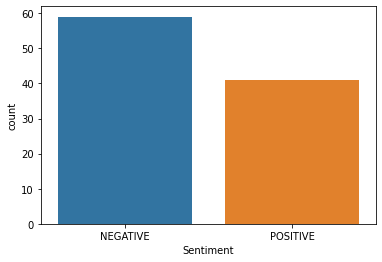

In [17]:
sns.countplot(dfws.Sentiment)

In [18]:
sentiment_counts = dfws['Sentiment'].value_counts()
positivescore = sentiment_counts['POSITIVE']
negativescore = sentiment_counts['NEGATIVE']
impactscore1=(((positivescore-negativescore)/(positivescore+negativescore))*100)
impactscore1 = ((impactscore1 - (-100)) / (100 - (-100))) * 100
print('IMPACT SCORE=',impactscore1,'/100')

IMPACT SCORE= 41.0 /100
